In [1]:
#this command might be relevant ony on GPU nodes. But the notebook will run on CPU as well
#If running on CPU remove the command wherever it appears
!nvidia-smi

Wed Apr 27 03:24:20 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
openjdk version "11.0.14.1" 2022-02-08
OpenJDK Runtime Environment (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


In [3]:
!pip install h2o

     |████████████████████████████████| 177.0 MB 24 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.1-py2.py3-none-any.whl size=177068062 sha256=b6062b3c28c08b042a95ed95ed2bf7e9f2ebfb39bc57ca2f09b06126f0ca2412
  Stored in directory: /root/.cache/pip/wheels/a6/d9/ab/5442447c7e2ccf07f66aa8b79f3877ce5382f0b95e6c0c797b
Successfully built h2o


In [4]:
 import h2o

In [5]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.14.1" 2022-02-08; OpenJDK Runtime Environment (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpjeksql3u
  JVM stdout: /tmp/tmpjeksql3u/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpjeksql3u/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_unknownUser_famesz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [6]:
from h2o.automl import H2OAutoML

In [8]:
churn_df = h2o.import_file('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [9]:
churn_df.types

{'Churn': 'enum',
 'Contract': 'enum',
 'Dependents': 'enum',
 'DeviceProtection': 'enum',
 'InternetService': 'enum',
 'MonthlyCharges': 'real',
 'MultipleLines': 'enum',
 'OnlineBackup': 'enum',
 'OnlineSecurity': 'enum',
 'PaperlessBilling': 'enum',
 'Partner': 'enum',
 'PaymentMethod': 'enum',
 'PhoneService': 'enum',
 'SeniorCitizen': 'int',
 'StreamingMovies': 'enum',
 'StreamingTV': 'enum',
 'TechSupport': 'enum',
 'TotalCharges': 'real',
 'customerID': 'string',
 'gender': 'enum',
 'tenure': 'int'}

In [10]:
churn_df.describe()

Rows:7043
Cols:21




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [11]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])

In [12]:
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No


In [13]:
y = "Churn"
x = churn_df.columns
x.remove(y)
x.remove("customerID")

In [14]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)


In [16]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
03:56:39.582: Project: AutoML_1_20220427_35639
03:56:39.583: Cross-validation disabled by user: no fold column nor nfolds > 1.
03:56:39.583: Setting stopping tolerance adaptively based on the training frame: 0.014282799726001058
03:56:39.583: Build control seed: 10
03:56:39.584: training frame: Frame key: AutoML_1_20220427_35639_training_py_2_sid_80bc    cols: 21    rows: 4902  chunks: 8    size: 236180  checksum: 8434007607021042281
03:56:39.584: validation frame: Frame key: py_4_sid_80bc    cols: 21    rows: 1059  chunks: 8    size: 109844  checksum: 5922256915335799911
03:56:39.585: leaderboard frame: Frame key: py_4_sid_80bc    cols: 21    rows: 1059  chunks: 8    size: 109844  checksum: 5922256915335799911
03:56:39.585: blending frame: NULL
03:56:39.585: response column: Churn
03:56:39.585: fold column: null
03:56:39.586: weights column: null
03:56:39.604: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), 

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,45.0,45.0,19182.0,6.0,14.0,8.555555,25.0,31.0,29.155556




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.1174283772157708
RMSE: 0.3426782415266117
LogLoss: 0.3662089045231443
Mean Per-Class Error: 0.1999211478153901
AUC: 0.8890977543621433
AUCPR: 0.7377389942035476
Gini: 0.7781955087242867

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34956831945673983: 


,,No,Yes,Error,Rate
0,No,3035.0,560.0,0.1558,(560.0/3595.0)
1,Yes,319.0,988.0,0.2441,(319.0/1307.0)
2,Total,3354.0,1548.0,0.1793,(879.0/4902.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.349568,0.692119,204.0
1,max f2,0.184606,0.787474,283.0
2,max f0point5,0.538923,0.695669,130.0
3,max accuracy,0.476547,0.832109,154.0
4,max precision,0.925310,1.000000,0.0
5,max recall,0.024361,1.000000,383.0
6,max specificity,0.925310,1.000000,0.0
7,max absolute_mcc,0.349568,0.570934,204.0
8,max min_per_class_accuracy,0.304645,0.805662,224.0
9,max mean_per_class_accuracy,0.243406,0.808819,253.0



Gains/Lift Table: Avg response rate: 26.66 %, avg score: 26.74 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010200,0.869524,3.525539,3.525539,0.940000,0.889036,0.940000,0.889036,0.035960,0.035960,252.553940,252.553940,0.035126
1,2,0.020400,0.846674,3.450528,3.488034,0.920000,0.856518,0.930000,0.872777,0.035195,0.071155,245.052793,248.803366,0.069208
2,3,0.030192,0.820656,3.516163,3.497157,0.937500,0.833646,0.932432,0.860086,0.034430,0.105585,251.616297,249.715668,0.102804
3,4,0.040392,0.796440,3.150482,3.409613,0.840000,0.807391,0.909091,0.846779,0.032135,0.137720,215.048202,240.961258,0.132713
4,5,0.050184,0.782238,3.203615,3.369418,0.854167,0.789316,0.898374,0.835567,0.031370,0.169090,220.361515,236.941796,0.162135
5,6,0.100163,0.685037,2.893300,3.131844,0.771429,0.733795,0.835031,0.784785,0.144606,0.313695,189.329981,213.184373,0.291164
6,7,0.150143,0.605371,2.571822,2.945423,0.685714,0.642050,0.785326,0.737271,0.128539,0.442234,157.182206,194.542347,0.398284
7,8,0.200122,0.523120,2.265653,2.775654,0.604082,0.565533,0.740061,0.694380,0.113236,0.555471,126.565276,177.565403,0.484539
8,9,0.300082,0.367762,1.714548,2.422192,0.457143,0.441891,0.645819,0.610274,0.171385,0.726855,71.454804,142.219248,0.581932
9,10,0.400041,0.261835,1.186406,2.113403,0.316327,0.311468,0.563488,0.535611,0.118592,0.845448,18.640601,111.340341,0.607339




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.13500122749190352
RMSE: 0.3674251318185836
LogLoss: 0.41203801917583455
Mean Per-Class Error: 0.2202053719564145
AUC: 0.8521232231738486
AUCPR: 0.695157897080254
Gini: 0.7042464463476972

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22553399563324383: 


,,No,Yes,Error,Rate
0,No,547.0,222.0,0.2887,(222.0/769.0)
1,Yes,44.0,246.0,0.1517,(44.0/290.0)
2,Total,591.0,468.0,0.2512,(266.0/1059.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.225534,0.649077,254.0
1,max f2,0.148423,0.765896,292.0
2,max f0point5,0.574266,0.667641,111.0
3,max accuracy,0.574266,0.811143,111.0
4,max precision,0.905855,1.000000,0.0
5,max recall,0.022732,1.000000,382.0
6,max specificity,0.905855,1.000000,0.0
7,max absolute_mcc,0.225534,0.502475,254.0
8,max min_per_class_accuracy,0.275492,0.762069,227.0
9,max mean_per_class_accuracy,0.225534,0.779795,254.0



Gains/Lift Table: Avg response rate: 27.38 %, avg score: 26.90 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010387,0.874020,3.319749,3.319749,0.909091,0.888439,0.909091,0.888439,0.034483,0.034483,231.974922,231.974922,0.033182
1,2,0.020774,0.843259,3.319749,3.319749,0.909091,0.858122,0.909091,0.873280,0.034483,0.068966,231.974922,231.974922,0.066365
2,3,0.030217,0.821618,3.651724,3.423491,1.000000,0.833537,0.937500,0.860861,0.034483,0.103448,265.172414,242.349138,0.100847
3,4,0.040604,0.806147,3.319749,3.396953,0.909091,0.812862,0.930233,0.848582,0.034483,0.137931,231.974922,239.695269,0.134030
4,5,0.050047,0.788058,3.286552,3.376122,0.900000,0.800085,0.924528,0.839432,0.031034,0.168966,228.655172,237.612232,0.163764
5,6,0.100094,0.699133,2.756018,3.066070,0.754717,0.743755,0.839623,0.791593,0.137931,0.306897,175.601822,206.607027,0.284790
6,7,0.150142,0.605181,2.204815,2.778985,0.603774,0.652281,0.761006,0.745156,0.110345,0.417241,120.481457,177.898504,0.367827
7,8,0.200189,0.537919,1.653611,2.497642,0.452830,0.572513,0.683962,0.701995,0.082759,0.500000,65.361093,149.764151,0.412874
8,9,0.300283,0.370733,1.481360,2.158881,0.405660,0.442903,0.591195,0.615631,0.148276,0.648276,48.135979,115.888094,0.479225
9,10,0.400378,0.258838,1.378009,1.963663,0.377358,0.309489,0.537736,0.539096,0.137931,0.786207,37.800911,96.366298,0.531330




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-04-27 03:56:43,0.013 sec,0.0,0.442195,0.579874,0.500000,0.266626,1.000000,0.733374,0.445988,0.587177,0.500000,0.273843,1.000000,0.726157
1,,2022-04-27 03:56:44,0.496 sec,5.0,0.393342,0.478833,0.860153,0.681420,3.375516,0.213994,0.398371,0.488090,0.848202,0.686879,3.319749,0.240793
2,,2022-04-27 03:56:44,0.784 sec,10.0,0.372141,0.435366,0.865111,0.693456,3.317815,0.206242,0.379467,0.448358,0.851377,0.692771,3.347414,0.236072
3,,2022-04-27 03:56:44,1.022 sec,15.0,0.361784,0.411933,0.868467,0.702753,3.450528,0.186047,0.371669,0.429136,0.852399,0.694796,3.319749,0.240793
4,,2022-04-27 03:56:44,1.267 sec,20.0,0.356479,0.398796,0.872404,0.709000,3.450528,0.199918,0.369088,0.421372,0.851760,0.692217,3.319749,0.236072
5,,2022-04-27 03:56:45,1.438 sec,25.0,0.352893,0.389843,0.875510,0.715405,3.525539,0.194410,0.367876,0.416786,0.852168,0.694295,3.319749,0.248347
6,,2022-04-27 03:56:45,1.633 sec,30.0,0.349910,0.382653,0.878939,0.721200,3.525539,0.192166,0.367166,0.413761,0.852711,0.695412,3.319749,0.240793
7,,2022-04-27 03:56:45,1.789 sec,35.0,0.347219,0.376182,0.882703,0.727029,3.525539,0.187882,0.367044,0.413118,0.852054,0.694147,3.319749,0.242682
8,,2022-04-27 03:56:45,1.951 sec,40.0,0.344995,0.370978,0.885993,0.731714,3.525539,0.183395,0.367345,0.412598,0.852285,0.694040,3.319749,0.244570
9,,2022-04-27 03:56:45,2.160 sec,45.0,0.342678,0.366209,0.889098,0.737739,3.525539,0.179315,0.367425,0.412038,0.852123,0.695158,3.319749,0.251180



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract,596.989563,1.000000,0.318767
1,tenure,255.308044,0.427659,0.136324
2,OnlineSecurity,223.726532,0.374758,0.119460
3,TotalCharges,182.113998,0.305054,0.097241
4,MonthlyCharges,176.110428,0.294997,0.094035
5,InternetService,123.106087,0.206211,0.065733
6,PaymentMethod,74.699387,0.125127,0.039886
7,TechSupport,65.541405,0.109787,0.034996
8,PaperlessBilling,38.034702,0.063711,0.020309
9,MultipleLines,24.375679,0.040831,0.013016


In [17]:
lb = aml.leaderboard

In [18]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_1_20220427_35639,0.852123,0.412038,0.695158,0.220205,0.367425,0.135001
GLM_1_AutoML_1_20220427_35639,0.850823,0.415393,0.67813,0.235803,0.369209,0.136315
XGBoost_3_AutoML_1_20220427_35639,0.844527,0.423146,0.674184,0.243467,0.371822,0.138251
GBM_2_AutoML_1_20220427_35639,0.841805,0.426196,0.682638,0.23123,0.37354,0.139532
GBM_3_AutoML_1_20220427_35639,0.839951,0.429363,0.682032,0.246404,0.374429,0.140197
GBM_4_AutoML_1_20220427_35639,0.839171,0.43683,0.669406,0.232669,0.377722,0.142674
XGBoost_1_AutoML_1_20220427_35639,0.838079,0.433254,0.675933,0.243518,0.376168,0.141503
XRT_1_AutoML_1_20220427_35639,0.837227,0.429637,0.676446,0.237133,0.374497,0.140248
XGBoost_2_AutoML_1_20220427_35639,0.836716,0.44172,0.670472,0.255924,0.379419,0.143959
DRF_1_AutoML_1_20220427_35639,0.833068,0.464934,0.668208,0.238433,0.376154,0.141492


In [19]:
churn_pred=aml.leader.predict(churn_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [20]:
churn_pred.head()

predict,No,Yes
Yes,0.303234,0.696766
Yes,0.627548,0.372452
Yes,0.56608,0.43392
No,0.915084,0.0849164
No,0.908346,0.0916544
No,0.948979,0.0510211
No,0.961554,0.0384464
Yes,0.421351,0.578649
Yes,0.448923,0.551077
No,0.94813,0.0518704


In [21]:
aml.leader.model_performance(churn_test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.1362073280074257
RMSE: 0.3690627697390048
LogLoss: 0.4191190061166772
Mean Per-Class Error: 0.23192628903413215
AUC: 0.8357865831517792
AUCPR: 0.6179458355169171
Gini: 0.6715731663035585

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2744003716297835: 


,,No,Yes,Error,Rate
0,No,607.0,203.0,0.2506,(203.0/810.0)
1,Yes,58.0,214.0,0.2132,(58.0/272.0)
2,Total,665.0,417.0,0.2412,(261.0/1082.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.274400,0.621190,225.0
1,max f2,0.141467,0.739750,295.0
2,max f0point5,0.529607,0.608614,119.0
3,max accuracy,0.535576,0.804991,117.0
4,max precision,0.914970,1.000000,0.0
5,max recall,0.017192,1.000000,389.0
6,max specificity,0.914970,1.000000,0.0
7,max absolute_mcc,0.274400,0.477895,225.0
8,max min_per_class_accuracy,0.289665,0.761029,218.0
9,max mean_per_class_accuracy,0.274400,0.768074,225.0



Gains/Lift Table: Avg response rate: 25.14 %, avg score: 26.37 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010166,0.868460,2.893048,2.893048,0.727273,0.890975,0.727273,0.890975,0.029412,0.029412,189.304813,189.304813,0.025708
1,2,0.020333,0.844653,3.616310,3.254679,0.909091,0.856013,0.818182,0.873494,0.036765,0.066176,261.631016,225.467914,0.061238
2,3,0.030499,0.816316,3.254679,3.254679,0.818182,0.828531,0.818182,0.858506,0.033088,0.099265,225.467914,225.467914,0.091857
3,4,0.040665,0.797832,2.531417,3.073864,0.636364,0.807105,0.772727,0.845656,0.025735,0.125000,153.141711,207.386364,0.112654
4,5,0.050832,0.781580,3.616310,3.182353,0.909091,0.788986,0.800000,0.834322,0.036765,0.161765,261.631016,218.235294,0.148184
5,6,0.100739,0.656625,2.283633,2.737115,0.574074,0.721722,0.688073,0.778539,0.113971,0.275735,128.363290,173.711549,0.233760
6,7,0.150647,0.582323,2.430964,2.635691,0.611111,0.618385,0.662577,0.725481,0.121324,0.397059,143.096405,163.569109,0.329158
7,8,0.200555,0.503140,2.062636,2.493088,0.518519,0.543400,0.626728,0.680171,0.102941,0.500000,106.263617,149.308756,0.400000
8,9,0.300370,0.366768,1.731141,2.239887,0.435185,0.436041,0.563077,0.599045,0.172794,0.672794,73.114107,123.988688,0.497485
9,10,0.400185,0.255061,1.178649,1.975190,0.296296,0.309793,0.496536,0.526899,0.117647,0.790441,17.864924,97.519019,0.521305


In [22]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

In [23]:
model_ids

['GBM_1_AutoML_1_20220427_35639',
 'GLM_1_AutoML_1_20220427_35639',
 'XGBoost_3_AutoML_1_20220427_35639',
 'GBM_2_AutoML_1_20220427_35639',
 'GBM_3_AutoML_1_20220427_35639',
 'GBM_4_AutoML_1_20220427_35639',
 'XGBoost_1_AutoML_1_20220427_35639',
 'XRT_1_AutoML_1_20220427_35639',
 'XGBoost_2_AutoML_1_20220427_35639',
 'DRF_1_AutoML_1_20220427_35639']

In [24]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_1_20220427_35639


Model Summary: 


,,number_of_trees
0,,35.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10495343051892302
RMSE: 0.3239651686816393
LogLoss: 0.33077165148231785
Mean Per-Class Error: 0.16837910342618595
AUC: 0.9127187190404082
AUCPR: 0.7900801053351918
Gini: 0.8254374380808165

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35586570317928606: 


,,No,Yes,Error,Rate
0,No,3083.0,512.0,0.1424,(512.0/3595.0)
1,Yes,254.0,1053.0,0.1943,(254.0/1307.0)
2,Total,3337.0,1565.0,0.1563,(766.0/4902.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.355866,0.733287,215.0
1,max f2,0.213577,0.814033,272.0
2,max f0point5,0.590760,0.728513,126.0
3,max accuracy,0.434729,0.850469,186.0
4,max precision,0.962347,1.000000,0.0
5,max recall,0.018331,1.000000,383.0
6,max specificity,0.962347,1.000000,0.0
7,max absolute_mcc,0.355866,0.629106,215.0
8,max min_per_class_accuracy,0.322342,0.833936,228.0
9,max mean_per_class_accuracy,0.310706,0.837745,233.0



Gains/Lift Table: Avg response rate: 26.66 %, avg score: 26.57 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010200,0.910876,3.525539,3.525539,0.940000,0.925697,0.940000,0.925697,0.035960,0.035960,252.553940,252.553940,0.035126
1,2,0.020400,0.879281,3.675562,3.600551,0.980000,0.895309,0.960000,0.910503,0.037490,0.073451,267.556236,260.055088,0.072338
2,3,0.030192,0.854779,3.516163,3.573182,0.937500,0.867098,0.952703,0.896426,0.034430,0.107881,251.616297,257.318183,0.105933
3,4,0.040188,0.833114,3.444405,3.541151,0.918367,0.843301,0.944162,0.883212,0.034430,0.142311,244.440454,254.115093,0.139251
4,5,0.050184,0.815877,3.367862,3.506634,0.897959,0.824142,0.934959,0.871446,0.033665,0.175976,236.786222,250.663407,0.171525
5,6,0.100163,0.723523,3.153544,3.330448,0.840816,0.768787,0.887984,0.820221,0.157613,0.333588,215.354371,233.044845,0.318289
6,7,0.150143,0.623781,2.663673,3.108492,0.710204,0.671317,0.828804,0.770654,0.133129,0.466718,166.367284,210.849190,0.431669
7,8,0.200122,0.538426,2.173802,2.875058,0.579592,0.579528,0.766565,0.722921,0.108646,0.575363,117.380198,187.505762,0.511664
8,9,0.300082,0.379643,1.982446,2.577723,0.528571,0.456114,0.687288,0.634046,0.198164,0.773527,98.244617,157.772274,0.645572
9,10,0.400041,0.248049,1.148135,2.220508,0.306122,0.313022,0.592045,0.553831,0.114767,0.888294,14.813485,122.050802,0.665763




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.13825141803388177
RMSE: 0.37182175572965304
LogLoss: 0.4231457207079258
Mean Per-Class Error: 0.24346666068786155
AUC: 0.8445271512488229
AUCPR: 0.6741843943081619
Gini: 0.6890543024976459

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2322307974100113: 


,,No,Yes,Error,Rate
0,No,551.0,218.0,0.2835,(218.0/769.0)
1,Yes,59.0,231.0,0.2034,(59.0/290.0)
2,Total,610.0,449.0,0.2616,(277.0/1059.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.232231,0.625169,251.0
1,max f2,0.095192,0.761294,319.0
2,max f0point5,0.585945,0.671078,115.0
3,max accuracy,0.585945,0.813031,115.0
4,max precision,0.827610,0.933333,28.0
5,max recall,0.012438,1.000000,384.0
6,max specificity,0.941681,0.998700,0.0
7,max absolute_mcc,0.585945,0.491494,115.0
8,max min_per_class_accuracy,0.266847,0.747724,233.0
9,max mean_per_class_accuracy,0.168612,0.763452,281.0



Gains/Lift Table: Avg response rate: 27.38 %, avg score: 26.78 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010387,0.911528,2.987774,2.987774,0.818182,0.929498,0.818182,0.929498,0.031034,0.031034,198.777429,198.777429,0.028434
1,2,0.020774,0.889844,3.651724,3.319749,1.000000,0.897021,0.909091,0.913259,0.037931,0.068966,265.172414,231.974922,0.066365
2,3,0.030217,0.866293,3.286552,3.309375,0.900000,0.879074,0.906250,0.902576,0.031034,0.100000,228.655172,230.937500,0.096099
3,4,0.040604,0.830200,3.651724,3.396953,1.000000,0.845988,0.930233,0.888100,0.037931,0.137931,265.172414,239.695269,0.134030
4,5,0.050047,0.812978,2.556207,3.238321,0.700000,0.821425,0.886792,0.875520,0.024138,0.162069,155.620690,223.832141,0.154267
5,6,0.100094,0.725726,2.756018,2.997170,0.754717,0.774549,0.820755,0.825035,0.137931,0.300000,175.601822,199.716981,0.275293
6,7,0.150142,0.623765,2.204815,2.733051,0.603774,0.680946,0.748428,0.777005,0.110345,0.410345,120.481457,173.305140,0.358329
7,8,0.200189,0.544199,1.998113,2.549317,0.547170,0.590169,0.698113,0.730296,0.100000,0.510345,99.811321,154.931685,0.427120
8,9,0.300283,0.379282,1.309109,2.135914,0.358491,0.451681,0.584906,0.637425,0.131034,0.641379,30.910865,113.591412,0.469728
9,10,0.401322,0.257381,1.194489,1.898897,0.327103,0.312391,0.520000,0.555593,0.120690,0.762069,19.448920,89.889655,0.496789




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-04-27 03:56:55,0.002 sec,0.0,0.500000,0.693147,0.500000,0.266626,1.000000,0.733374,0.500000,0.693147,0.500000,0.273843,1.000000,0.726157
1,,2022-04-27 03:56:55,0.081 sec,5.0,0.364363,0.424542,0.868923,0.704252,3.600551,0.196042,0.374334,0.441358,0.849664,0.695409,3.651724,0.254013
2,,2022-04-27 03:56:55,0.164 sec,10.0,0.348362,0.381542,0.880522,0.728563,3.529952,0.190942,0.367837,0.416309,0.849433,0.692449,3.319749,0.238905
3,,2022-04-27 03:56:55,0.251 sec,15.0,0.341723,0.365921,0.889033,0.744990,3.600551,0.175031,0.368619,0.417329,0.847034,0.693184,3.651724,0.264400
4,,2022-04-27 03:56:55,0.351 sec,20.0,0.336410,0.354872,0.896466,0.756815,3.525539,0.163811,0.367910,0.416676,0.847368,0.692467,3.319749,0.283286
5,,2022-04-27 03:56:55,0.434 sec,25.0,0.333209,0.347953,0.900676,0.765975,3.600551,0.161567,0.368801,0.416853,0.847175,0.684140,2.987774,0.268178
6,,2022-04-27 03:56:55,0.519 sec,30.0,0.328447,0.338619,0.907451,0.778504,3.600551,0.164219,0.369703,0.418651,0.846599,0.680845,2.987774,0.272899
7,,2022-04-27 03:56:55,0.614 sec,35.0,0.323965,0.330772,0.912719,0.790080,3.525539,0.156263,0.371822,0.423146,0.844527,0.674184,2.987774,0.261568



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,tenure,793.538086,1.000000,0.189499
1,Contract.Month-to-month,691.514587,0.871432,0.165136
2,MonthlyCharges,551.545105,0.695046,0.131710
3,OnlineSecurity.No,438.619446,0.552739,0.104743
4,TotalCharges,372.821075,0.469821,0.089031
5,TechSupport.No,276.199860,0.348061,0.065957
6,InternetService.Fiber optic,124.846237,0.157329,0.029814
7,InternetService.DSL,98.831810,0.124546,0.023601
8,PaperlessBilling.No,84.158920,0.106055,0.020097
9,PaymentMethod.Electronic check,72.709305,0.091627,0.017363



See the whole table with table.as_data_frame()


In [25]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [26]:
out.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'backend': {'actual': 'gpu', 'default': 'auto', 'input': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree', 'input': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False, 'input': False},
 'calibrate_model': {'actual': False, 'default': False, 'input': False},
 'calibration_frame': {'actual': None, 'default': None, 'input': None},
 'categorical_encoding': {'actual': 'OneHotInternal',
  'default': 'AUTO',
  'input': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None, 'input': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'colsample_bynode': {'actual': 1.0, 'default': 1.0, 'input': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'distribution': {'actual': 'bernoulli',
  'default': 'AUTO'

In [27]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'gpu_id': 0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_bin': 256,
  'max_delta_step': 0.0,
  'max_depth': 5,
  'min_child_weight': 3.0,
  'nround': 10000,
  'nthread': 2,
  'objective': 'binary:logistic',
  'seed': 18,
  'silent': True,
  'subsample': 0.8,
  'updater': 'grow_gpu_hist'},
 10000)

In [28]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_1_20220427_35639


Model Summary: 


,,number_of_trees
0,,35.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10495343051892302
RMSE: 0.3239651686816393
LogLoss: 0.33077165148231785
Mean Per-Class Error: 0.16837910342618595
AUC: 0.9127187190404082
AUCPR: 0.7900801053351918
Gini: 0.8254374380808165

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35586570317928606: 


,,No,Yes,Error,Rate
0,No,3083.0,512.0,0.1424,(512.0/3595.0)
1,Yes,254.0,1053.0,0.1943,(254.0/1307.0)
2,Total,3337.0,1565.0,0.1563,(766.0/4902.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.355866,0.733287,215.0
1,max f2,0.213577,0.814033,272.0
2,max f0point5,0.590760,0.728513,126.0
3,max accuracy,0.434729,0.850469,186.0
4,max precision,0.962347,1.000000,0.0
5,max recall,0.018331,1.000000,383.0
6,max specificity,0.962347,1.000000,0.0
7,max absolute_mcc,0.355866,0.629106,215.0
8,max min_per_class_accuracy,0.322342,0.833936,228.0
9,max mean_per_class_accuracy,0.310706,0.837745,233.0



Gains/Lift Table: Avg response rate: 26.66 %, avg score: 26.57 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010200,0.910876,3.525539,3.525539,0.940000,0.925697,0.940000,0.925697,0.035960,0.035960,252.553940,252.553940,0.035126
1,2,0.020400,0.879281,3.675562,3.600551,0.980000,0.895309,0.960000,0.910503,0.037490,0.073451,267.556236,260.055088,0.072338
2,3,0.030192,0.854779,3.516163,3.573182,0.937500,0.867098,0.952703,0.896426,0.034430,0.107881,251.616297,257.318183,0.105933
3,4,0.040188,0.833114,3.444405,3.541151,0.918367,0.843301,0.944162,0.883212,0.034430,0.142311,244.440454,254.115093,0.139251
4,5,0.050184,0.815877,3.367862,3.506634,0.897959,0.824142,0.934959,0.871446,0.033665,0.175976,236.786222,250.663407,0.171525
5,6,0.100163,0.723523,3.153544,3.330448,0.840816,0.768787,0.887984,0.820221,0.157613,0.333588,215.354371,233.044845,0.318289
6,7,0.150143,0.623781,2.663673,3.108492,0.710204,0.671317,0.828804,0.770654,0.133129,0.466718,166.367284,210.849190,0.431669
7,8,0.200122,0.538426,2.173802,2.875058,0.579592,0.579528,0.766565,0.722921,0.108646,0.575363,117.380198,187.505762,0.511664
8,9,0.300082,0.379643,1.982446,2.577723,0.528571,0.456114,0.687288,0.634046,0.198164,0.773527,98.244617,157.772274,0.645572
9,10,0.400041,0.248049,1.148135,2.220508,0.306122,0.313022,0.592045,0.553831,0.114767,0.888294,14.813485,122.050802,0.665763




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.13825141803388177
RMSE: 0.37182175572965304
LogLoss: 0.4231457207079258
Mean Per-Class Error: 0.24346666068786155
AUC: 0.8445271512488229
AUCPR: 0.6741843943081619
Gini: 0.6890543024976459

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2322307974100113: 


,,No,Yes,Error,Rate
0,No,551.0,218.0,0.2835,(218.0/769.0)
1,Yes,59.0,231.0,0.2034,(59.0/290.0)
2,Total,610.0,449.0,0.2616,(277.0/1059.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.232231,0.625169,251.0
1,max f2,0.095192,0.761294,319.0
2,max f0point5,0.585945,0.671078,115.0
3,max accuracy,0.585945,0.813031,115.0
4,max precision,0.827610,0.933333,28.0
5,max recall,0.012438,1.000000,384.0
6,max specificity,0.941681,0.998700,0.0
7,max absolute_mcc,0.585945,0.491494,115.0
8,max min_per_class_accuracy,0.266847,0.747724,233.0
9,max mean_per_class_accuracy,0.168612,0.763452,281.0



Gains/Lift Table: Avg response rate: 27.38 %, avg score: 26.78 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010387,0.911528,2.987774,2.987774,0.818182,0.929498,0.818182,0.929498,0.031034,0.031034,198.777429,198.777429,0.028434
1,2,0.020774,0.889844,3.651724,3.319749,1.000000,0.897021,0.909091,0.913259,0.037931,0.068966,265.172414,231.974922,0.066365
2,3,0.030217,0.866293,3.286552,3.309375,0.900000,0.879074,0.906250,0.902576,0.031034,0.100000,228.655172,230.937500,0.096099
3,4,0.040604,0.830200,3.651724,3.396953,1.000000,0.845988,0.930233,0.888100,0.037931,0.137931,265.172414,239.695269,0.134030
4,5,0.050047,0.812978,2.556207,3.238321,0.700000,0.821425,0.886792,0.875520,0.024138,0.162069,155.620690,223.832141,0.154267
5,6,0.100094,0.725726,2.756018,2.997170,0.754717,0.774549,0.820755,0.825035,0.137931,0.300000,175.601822,199.716981,0.275293
6,7,0.150142,0.623765,2.204815,2.733051,0.603774,0.680946,0.748428,0.777005,0.110345,0.410345,120.481457,173.305140,0.358329
7,8,0.200189,0.544199,1.998113,2.549317,0.547170,0.590169,0.698113,0.730296,0.100000,0.510345,99.811321,154.931685,0.427120
8,9,0.300283,0.379282,1.309109,2.135914,0.358491,0.451681,0.584906,0.637425,0.131034,0.641379,30.910865,113.591412,0.469728
9,10,0.401322,0.257381,1.194489,1.898897,0.327103,0.312391,0.520000,0.555593,0.120690,0.762069,19.448920,89.889655,0.496789




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-04-27 03:56:55,0.002 sec,0.0,0.500000,0.693147,0.500000,0.266626,1.000000,0.733374,0.500000,0.693147,0.500000,0.273843,1.000000,0.726157
1,,2022-04-27 03:56:55,0.081 sec,5.0,0.364363,0.424542,0.868923,0.704252,3.600551,0.196042,0.374334,0.441358,0.849664,0.695409,3.651724,0.254013
2,,2022-04-27 03:56:55,0.164 sec,10.0,0.348362,0.381542,0.880522,0.728563,3.529952,0.190942,0.367837,0.416309,0.849433,0.692449,3.319749,0.238905
3,,2022-04-27 03:56:55,0.251 sec,15.0,0.341723,0.365921,0.889033,0.744990,3.600551,0.175031,0.368619,0.417329,0.847034,0.693184,3.651724,0.264400
4,,2022-04-27 03:56:55,0.351 sec,20.0,0.336410,0.354872,0.896466,0.756815,3.525539,0.163811,0.367910,0.416676,0.847368,0.692467,3.319749,0.283286
5,,2022-04-27 03:56:55,0.434 sec,25.0,0.333209,0.347953,0.900676,0.765975,3.600551,0.161567,0.368801,0.416853,0.847175,0.684140,2.987774,0.268178
6,,2022-04-27 03:56:55,0.519 sec,30.0,0.328447,0.338619,0.907451,0.778504,3.600551,0.164219,0.369703,0.418651,0.846599,0.680845,2.987774,0.272899
7,,2022-04-27 03:56:55,0.614 sec,35.0,0.323965,0.330772,0.912719,0.790080,3.525539,0.156263,0.371822,0.423146,0.844527,0.674184,2.987774,0.261568



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,tenure,793.538086,1.000000,0.189499
1,Contract.Month-to-month,691.514587,0.871432,0.165136
2,MonthlyCharges,551.545105,0.695046,0.131710
3,OnlineSecurity.No,438.619446,0.552739,0.104743
4,TotalCharges,372.821075,0.469821,0.089031
5,TechSupport.No,276.199860,0.348061,0.065957
6,InternetService.Fiber optic,124.846237,0.157329,0.029814
7,InternetService.DSL,98.831810,0.124546,0.023601
8,PaperlessBilling.No,84.158920,0.106055,0.020097
9,PaymentMethod.Electronic check,72.709305,0.091627,0.017363



See the whole table with table.as_data_frame()


In [29]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [30]:
out.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35586570317928606: 


,,No,Yes,Error,Rate
0,No,3083.0,512.0,0.1424,(512.0/3595.0)
1,Yes,254.0,1053.0,0.1943,(254.0/1307.0)
2,Total,3337.0,1565.0,0.1563,(766.0/4902.0)


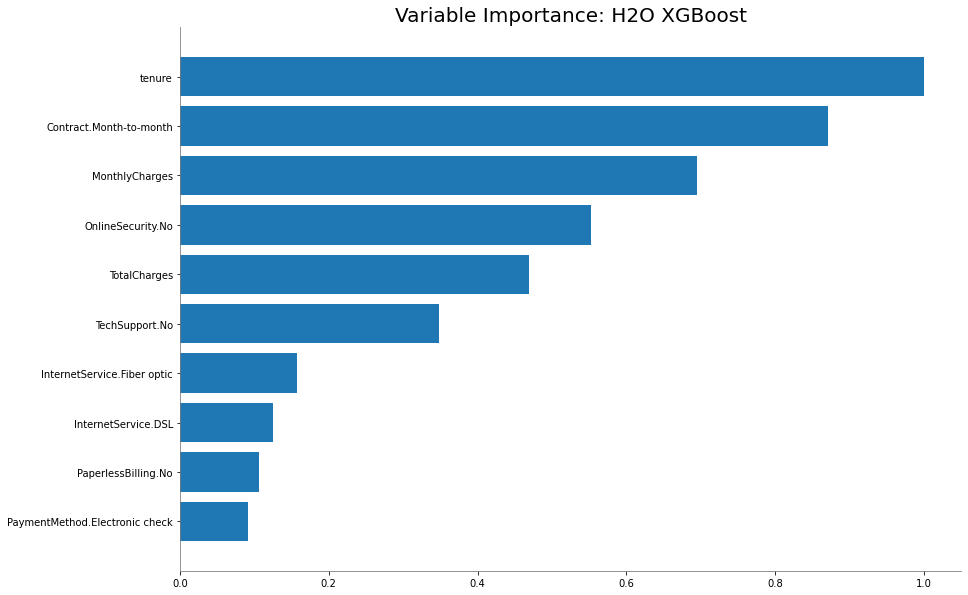

<Figure size 432x288 with 0 Axes>

In [31]:
out.varimp_plot()

In [32]:
aml.leader.download_mojo(path = "./")

'/content/GBM_1_AutoML_1_20220427_35639.zip'